### 배경
안녕하세요 여러분!🙌 구내식당 식수 인원 예측 AI 경진대회에 오신 것을 환영합니다.



지금까지는 단순한 시계열 추세와 담당자의 직관적 경험에 의존하여 "한국토지주택공사 구내식당 식수 인원"을 예측하였으나,

빅데이터 분석으로 얻어지는 보다 정확도 높은 예측을 통해 잔반 발생량을 획기적으로 줄이고자 합니다.

### 목적
구내식당의 요일별 점심, 저녁식사를 먹는 인원을 예측

In [1]:
from IPython.display import Image 

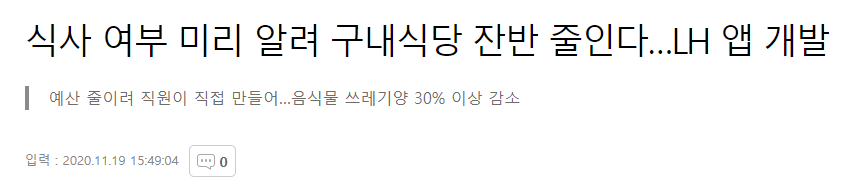

In [2]:
Image("C:/Users/user/Pictures/Camera Roll/구내식당_기사.png") # code안에서 나오게 할 때

- LH는 2020년에 구내식당 잔반을 줄이기 위해 앱을 개발해서 음식물쓰레기 양을 감소시킴
- 2021년 데이콘에 대회를 열었고, AI를 활용하여 요일별 구내식당 이용자 수를 예측해보고자 함

### 가설
- (1) "중식계"가 많은 날 "석식계"가 많을 것이다?
- (2) 대체적으로 "금"요일에 석식계가 적을 것이다? (퇴근 빨리 하는 사람들이 많을 것 같다..)
- (3) 비오는 날 / 온도가 높은 날 등 중식계가 높을 것이다? (비 오면 아무래도 구내에서 먹을 것 같고, 엄청 더우면 나가기 싫을 것 같다..)
- (4) 음식 옆에 new라고 적혀 있는 메뉴가 있다.. new 일수록 구내식당에서 밥 먹는 사람들이 많을 것이다?

### 전처리

#### import

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import re

In [4]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [5]:
train_data = pd.read_csv("C:/Users/user/Documents/python/Dacon/data/식수예측/1_데이터 원본/train.csv", encoding = "utf8")
train_data.head(14)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0
5,2016-02-11,목,2601,383,143,417,0.0,팬케익/찐빵 우유/두유/주스 계란후라이 견과류죽/쌀밥 (쌀:국내산) 감자찌개 ...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 시래기국 훈제오리구이 도토리묵무침 쌈무/양...","참치회덮밥 (쌀,현미흑미:국내산) 맑은국 군만두 과일샐러드 락교 포기김치 (...",1045.0,550.0
6,2016-02-12,금,2601,389,156,93,0.0,모닝롤/야채샌드 우유/두유/주스 계란후라이 고구마죽/쌀밥 (쌀:국내산) 봄동된...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 꽃게탕 돈육굴소스볶음 옥수수전 유채나물 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치콩나물국 미니함박 어묵볶음 물파래무침 ...",909.0,598.0
7,2016-02-15,월,2601,87,204,482,0.0,모닝롤/치즈프레즐 우유/두유/주스 계란후라이 잣죽/쌀밥 (쌀:국내산) 민물새우...,쌀밥/잡곡밥 (쌀:국내산) 시금치국 닭감자조림 (닭고기:국내산) 연두부*양념장 ...,"쌀밥/잡곡밥 (쌀:국내산) 홍합미역국 등갈비김치찜 (돼지고기,김치:국내산) 임연수...",1268.0,672.0
8,2016-02-16,화,2601,72,236,526,0.0,모닝롤/마늘빵 우유/두유/주스 계란후라이 단호박죽/쌀밥 (쌀:국내산) 어묵국 ...,쌀밥/잡곡밥 (쌀:국내산) 쇠고기무국 (쇠고기:호주산) 탕수어 (동태:러시아산) 오...,쌀밥/잡곡밥 (쌀:국내산) 된장찌개 쇠불고기 (쇠고기:호주산) 해파리겨자채 봄동...,1014.0,523.0
9,2016-02-17,수,2601,78,250,23,0.0,모닝롤/참치샌드 우유/두유/주스 계란후라이 흑임자죽/쌀밥 (쌀:국내산) 북어계...,쌀밥/잡곡밥 (쌀:국내산) 냉이된장국 쇠고기장조림 (쇠고기:호주산) 통도라지구이 ...,볶음밥*자장소스 (쌀:국내산) 맑은국 새우또띠아 쨔샤이무침 요플레 포기김치 ...,916.0,588.0


#### data null / 이상값 확인

In [6]:
train_data.isnull().sum()

일자                0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
조식메뉴              0
중식메뉴              0
석식메뉴              0
중식계               0
석식계               0
dtype: int64

null 값 없음

#### 데이터 전처리

중식, 석식 메뉴 앞에 3개만 추출

In [7]:
train_data_ = train_data.copy()
train_data_.tail()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0
1204,2021-01-26,화,2983,69,183,551,362.0,모닝롤/야채샌드 우유/주스 계란후라이/찐계란 참치죽/흑미밥 홍합탕 애호박새우젓볶음 ...,쌀밥/귀리밥/찰현미밥 들깨미역국 교촌간장치킨 옥수수콘치즈구이 가지고추장무침 포기김치...,(New)할라피뇨멸치주먹밥 잔치국수 수제고기육전 쑥갓나물 양파초절임 깍두기,1015.0,480.0


##### new 메뉴 표시

In [8]:
train_data_["new_col(중식)"] =  1
train_data_["new_col(석식)"] =  1
train_data_.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,new_col(중식),new_col(석식)
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,1,1
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,1,1
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,1,1


In [9]:
new_lun__index = train_data_[train_data_['중식메뉴'].str.contains("(New)")].index
new_din__index = train_data_[train_data_['석식메뉴'].str.contains("(New)")].index

train_data_.loc[new_din__index]

train_data_["new_col(중식)"] = train_data_.loc[new_lun__index]["new_col(중식)"].replace({1 : "o"})
train_data_["new_col(석식)"] = train_data_.loc[new_din__index]["new_col(석식)"].replace({1 : "o"})

train_data_

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,new_col(중식),new_col(석식)
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,NaN,NaN
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,NaN,NaN
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,NaN,NaN
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,NaN,NaN
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0,NaN,NaN
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0,NaN,NaN
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0,NaN,NaN
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0,NaN,NaN


In [10]:
train_data_[["new_col(중식)","new_col(석식)"]] = train_data_[["new_col(중식)","new_col(석식)"]].fillna("x")
train_data_.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,new_col(중식),new_col(석식)
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,x,x
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,x,x
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,x,x
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,x,x
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,x,x


##### 괄호 안에 문자 제거
- 고춧가루 : 중국산 이건 왜 안 지워질까.. (근데 어치피 대표메뉴만 뽑을거니까 상관없긴 하다. . .)

In [11]:
regex = r'\([^)]*\)'   # 괄호 안에 문자 제거

# text = re.sub(regex, '',train_data_) # 정규식을 통해 괄호와 괄호안 문자열 제거 
# out = " ".join(text.split())
# out

for i in range(len(train_data_)): 
    train_data_['중식메뉴'][i] = re.sub(regex, '', train_data_['중식메뉴'][i]) 
    train_data_['중식메뉴'][i] = train_data_['중식메뉴'][i].lstrip()
    print(train_data_['중식메뉴'][i])
    out = " ".join(train_data_['중식메뉴'][i].split())
    print(out)

쌀밥/잡곡밥  오징어찌개  쇠불고기  계란찜  청포묵무침  요구르트  포기김치  
쌀밥/잡곡밥 오징어찌개 쇠불고기 계란찜 청포묵무침 요구르트 포기김치
쌀밥/잡곡밥  김치찌개  가자미튀김  모둠소세지구이  마늘쫑무침  요구르트  배추겉절이  
쌀밥/잡곡밥 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무침 요구르트 배추겉절이
카레덮밥  팽이장국  치킨핑거  쫄면야채무침  견과류조림  요구르트  포기김치  
카레덮밥 팽이장국 치킨핑거 쫄면야채무침 견과류조림 요구르트 포기김치
쌀밥/잡곡밥  쇠고기무국  주꾸미볶음  부추전  시금치나물  요구르트  포기김치  
쌀밥/잡곡밥 쇠고기무국 주꾸미볶음 부추전 시금치나물 요구르트 포기김치
쌀밥/잡곡밥  떡국  돈육씨앗강정  우엉잡채  청경채무침  요구르트  포기김치  
쌀밥/잡곡밥 떡국 돈육씨앗강정 우엉잡채 청경채무침 요구르트 포기김치
쌀밥/잡곡밥  시래기국  훈제오리구이  도토리묵무침  쌈무/양파절임  요구르트  포기김치  
쌀밥/잡곡밥 시래기국 훈제오리구이 도토리묵무침 쌈무/양파절임 요구르트 포기김치
쌀밥/잡곡밥  꽃게탕  돈육굴소스볶음  옥수수전  유채나물  요구르트  포기김치  
쌀밥/잡곡밥 꽃게탕 돈육굴소스볶음 옥수수전 유채나물 요구르트 포기김치
쌀밥/잡곡밥  시금치국  닭감자조림  연두부*양념장  콩나물무침  요구르트  포기김치  
쌀밥/잡곡밥 시금치국 닭감자조림 연두부*양념장 콩나물무침 요구르트 포기김치
쌀밥/잡곡밥  쇠고기무국  탕수어  오징어숙회무침  취나물  요구르트  포기김치  
쌀밥/잡곡밥 쇠고기무국 탕수어 오징어숙회무침 취나물 요구르트 포기김치
쌀밥/잡곡밥  냉이된장국  쇠고기장조림  통도라지구이  치커리무침  요구르트  포기김치  
쌀밥/잡곡밥 냉이된장국 쇠고기장조림 통도라지구이 치커리무침 요구르트 포기김치
낙지비빔밥  유부장국  고구마치즈구이  해초무침  요구르트  요구르트  포기김치  
낙지비빔밥 유부장국 고구마치즈구이 해초무침 요구르트 요구르트 포기김치
쌀밥/잡곡밥  대구찌개  마늘간장치킨  새송이버섯볶

쌀밥/잡곡밥 쇠고기샤브국 꽁치구이 김치제육볶음 온두부 열무김치
쌀밥/잡곡밥  콩가루배추국  순살양념치킨  콩나물겨자채  모듬묵*양념장  포기김치  
쌀밥/잡곡밥 콩가루배추국 순살양념치킨 콩나물겨자채 모듬묵*양념장 포기김치
쌀밥/잡곡밥  근대국  짬뽕불고기  실곤약흑임자무침  도라지오이생채  포기김치  
쌀밥/잡곡밥 근대국 짬뽕불고기 실곤약흑임자무침 도라지오이생채 포기김치
쌀밥/잡곡밥  시래기들깨탕  닭갈비  해물파전  숙주나물  포기김치  
쌀밥/잡곡밥 시래기들깨탕 닭갈비 해물파전 숙주나물 포기김치
쌀밥/잡곡밥  콩나물국  삼겹살구이  어묵볶음  상추파무침  포기김치  
쌀밥/잡곡밥 콩나물국 삼겹살구이 어묵볶음 상추파무침 포기김치
쌀밥/잡곡밥  차돌박이찌개  매운주꾸미볶음  두부새싹구이  브로컬리초장  포기김치  
쌀밥/잡곡밥 차돌박이찌개 매운주꾸미볶음 두부새싹구이 브로컬리초장 포기김치
쌀밥/잡곡밥  미역국  쇠불고기/잡채  오징어숙회무침  미니케익/식혜  배추겉절이  
쌀밥/잡곡밥 미역국 쇠불고기/잡채 오징어숙회무침 미니케익/식혜 배추겉절이
쌀밥/잡곡밥  아욱국  훈제오리구이  계란찜  쌈무/부추생채  포기김치  
쌀밥/잡곡밥 아욱국 훈제오리구이 계란찜 쌈무/부추생채 포기김치
쌀밥/잡곡밥  고추장찌개  레몬탕수육  궁중떡찜  유채나물  포기김치  
쌀밥/잡곡밥 고추장찌개 레몬탕수육 궁중떡찜 유채나물 포기김치
쌀밥/잡곡밥  해물된장찌개  닭찜  새송이버섯전  얼갈이생채  포기김치  
쌀밥/잡곡밥 해물된장찌개 닭찜 새송이버섯전 얼갈이생채 포기김치
쌀밥/잡곡밥  쇠고기무국  오징어볶음*소면  메추리알조림  치커리유자청무침  포기김치  
쌀밥/잡곡밥 쇠고기무국 오징어볶음*소면 메추리알조림 치커리유자청무침 포기김치
쌀밥/잡곡밥  차돌박이찌개  제육볶음  모둠쌈  해파리겨자채  포기김치  
쌀밥/잡곡밥 차돌박이찌개 제육볶음 모둠쌈 해파리겨자채 포기김치
쌀밥/잡곡밥  근대국  고등어조림  고추잡채*꽃빵  참나물생채  포기김치  
쌀밥/잡곡밥 근대국 고등어조림 고추잡채*꽃

쌀밥/잡곡밥  맑은순두부국  사천식탕수육  감자프리타타  청경채겉절이  포기김치  
쌀밥/잡곡밥 맑은순두부국 사천식탕수육 감자프리타타 청경채겉절이 포기김치
나물비빔밥  팽이장국  생선까스*칠리소스  갈비만두  송편/식혜/과일  포기김치  
나물비빔밥 팽이장국 생선까스*칠리소스 갈비만두 송편/식혜/과일 포기김치
쌀밥/잡곡밥  황태국  훈제오리고추장볶음  연두부*장  쌈무/부추생채  포기김치  
쌀밥/잡곡밥 황태국 훈제오리고추장볶음 연두부*장 쌈무/부추생채 포기김치
쌀밥/잡곡밥  꽃게된장찌개  돈육굴소스볶음  날치알계란찜  꽃상추겉절이  포기김치  
쌀밥/잡곡밥 꽃게된장찌개 돈육굴소스볶음 날치알계란찜 꽃상추겉절이 포기김치
쌀밥/잡곡밥  소고기미역국  탄두리치킨  오징어숙회무침  파스타샐러드 /오렌지주스  배추겉절이/과일  
쌀밥/잡곡밥 소고기미역국 탄두리치킨 오징어숙회무침 파스타샐러드 /오렌지주스 배추겉절이/과일
쌀밥/잡곡밥  쇠고기샤브국  주꾸미볶음  카레감자채볶음  호박나물  포기김치  
쌀밥/잡곡밥 쇠고기샤브국 주꾸미볶음 카레감자채볶음 호박나물 포기김치
쌀밥/잡곡밥  열무된장국  대패삼겹*파채  사각어묵무침  비름나물  포기김치  
쌀밥/잡곡밥 열무된장국 대패삼겹*파채 사각어묵무침 비름나물 포기김치
쌀밥/잡곡밥  근대국  유자청제육볶음  동그랑땡전  얼갈이겉절이  포기김치  
쌀밥/잡곡밥 근대국 유자청제육볶음 동그랑땡전 얼갈이겉절이 포기김치
쌀밥/잡곡밥  얼갈이된장국  버섯불고기  골뱅이무침  미역줄기볶음  포기김치  
쌀밥/잡곡밥 얼갈이된장국 버섯불고기 골뱅이무침 미역줄기볶음 포기김치
곤드레밥*양념장  맑은국  돈육강정  사과고구마그라탕  오복지무침  포기김치  
곤드레밥*양념장 맑은국 돈육강정 사과고구마그라탕 오복지무침 포기김치
쌀밥/잡곡밥  콩나물김치국  해물누룽지탕  두부스테이크  마늘쫑무침  깍두기  
쌀밥/잡곡밥 콩나물김치국 해물누룽지탕 두부스테이크 마늘쫑무침 깍두기
쌀밥/잡곡밥  어묵국  언양식불고기  계란말이  청경채생채  포기김치  
쌀밥/잡

In [12]:
regex = r'\([^)]*\)'   # 괄호 안에 문자 제거

# text = re.sub(regex, '',train_data_) # 정규식을 통해 괄호와 괄호안 문자열 제거 
# out = " ".join(text.split())
# out

for i in range(len(train_data_)): 
    train_data_['석식메뉴'][i] = re.sub(regex, '', train_data_['석식메뉴'][i]) 
    train_data_['중식메뉴'][i] = train_data_['중식메뉴'][i].lstrip()
    print(train_data_['석식메뉴'][i])
    out = " ".join(train_data_['석식메뉴'][i].split())
    print(out)

쌀밥/잡곡밥  육개장  자반고등어구이  두부조림  건파래무침  포기김치  
쌀밥/잡곡밥 육개장 자반고등어구이 두부조림 건파래무침 포기김치
콩나물밥*양념장  어묵국  유산슬  아삭고추무침  바나나  포기김치  
콩나물밥*양념장 어묵국 유산슬 아삭고추무침 바나나 포기김치
쌀밥/잡곡밥  청국장찌개  황태양념구이  고기전  새송이버섯볶음  포기김치  
쌀밥/잡곡밥 청국장찌개 황태양념구이 고기전 새송이버섯볶음 포기김치
미니김밥*겨자장  우동  멕시칸샐러드  군고구마  무피클  포기김치  
미니김밥*겨자장 우동 멕시칸샐러드 군고구마 무피클 포기김치
쌀밥/잡곡밥  차돌박이찌개  닭갈비  감자소세지볶음  콩나물무침  포기김치  
쌀밥/잡곡밥 차돌박이찌개 닭갈비 감자소세지볶음 콩나물무침 포기김치
참치회덮밥  맑은국  군만두  과일샐러드  락교  포기김치  
참치회덮밥 맑은국 군만두 과일샐러드 락교 포기김치
쌀밥/잡곡밥  김치콩나물국  미니함박  어묵볶음  물파래무침  깍두기  
쌀밥/잡곡밥 김치콩나물국 미니함박 어묵볶음 물파래무침 깍두기
쌀밥/잡곡밥  홍합미역국  등갈비김치찜  임연수구이  브로컬리초장  포기김치  
쌀밥/잡곡밥 홍합미역국 등갈비김치찜 임연수구이 브로컬리초장 포기김치
쌀밥/잡곡밥  된장찌개  쇠불고기  해파리겨자채  봄동무침  포기김치  
쌀밥/잡곡밥 된장찌개 쇠불고기 해파리겨자채 봄동무침 포기김치
볶음밥*자장소스  맑은국  새우또띠아  쨔샤이무침  요플레  포기김치  
볶음밥*자장소스 맑은국 새우또띠아 쨔샤이무침 요플레 포기김치
쌀밥/잡곡밥  순두부찌개  명태조림  감자채볶음  쌈만두  포기김치  
쌀밥/잡곡밥 순두부찌개 명태조림 감자채볶음 쌈만두 포기김치
쌀밥/잡곡밥  설렁탕  김치전  야채스틱  바나나  석박지  
쌀밥/잡곡밥 설렁탕 김치전 야채스틱 바나나 석박지
쌀밥/잡곡밥  옹심이만두국  떡갈비조림  청포묵무침  부추오이생채  포기김치  
쌀밥/잡곡밥 옹심이만두국 떡갈비조림 청포묵무침 부추오이생채 포기김치
쌀밥/잡곡밥  콩비지찌개  해물까스&타르타르소

오므라이스  가쯔오장국  떡볶이  양장피잡채  무피클  포기김치  
오므라이스 가쯔오장국 떡볶이 양장피잡채 무피클 포기김치
쌀밥/잡곡밥  쇠고기무국  쭈꾸미볶음  두부구이*양념장  청경채겉절이  포기김치  
쌀밥/잡곡밥 쇠고기무국 쭈꾸미볶음 두부구이*양념장 청경채겉절이 포기김치
쌀밥/잡곡밥  북어국  찜닭  탕평채  부추무침  포기김치  
쌀밥/잡곡밥 북어국 찜닭 탕평채 부추무침 포기김치
작은밥  콩국수  멕시칸샐러드  찐감자/수박  오복지  열무김치  
작은밥 콩국수 멕시칸샐러드 찐감자/수박 오복지 열무김치
쌀밥/잡곡밥  닭개장  해물청경채볶음  옥수수전  단배추나물  포기김치  
쌀밥/잡곡밥 닭개장 해물청경채볶음 옥수수전 단배추나물 포기김치
볶음밥  스파게티/크림스프  치킨텐더  마늘바게뜨/음료  수제피클  포기김치  
볶음밥 스파게티/크림스프 치킨텐더 마늘바게뜨/음료 수제피클 포기김치
쌀밥/잡곡밥  김치찌개  삼치된장구이  모듬소세지구이  숙주나물  알타리김치  
쌀밥/잡곡밥 김치찌개 삼치된장구이 모듬소세지구이 숙주나물 알타리김치
김밥볶음밥  미소장국  과일샐러드  비빔야채만두  찐옥수수/주스  포기김치  
김밥볶음밥 미소장국 과일샐러드 비빔야채만두 찐옥수수/주스 포기김치
쌀밥/잡곡밥  콩비지찌개  돈육굴소스볶음  날치알계란찜  무말랭이무침  열무김치  
쌀밥/잡곡밥 콩비지찌개 돈육굴소스볶음 날치알계란찜 무말랭이무침 열무김치
유부초밥  김치우동  왕새우튀김  단무지  포도  포기김치  
유부초밥 김치우동 왕새우튀김 단무지 포도 포기김치
쌀밥/잡곡밥  된장찌개  훈제오리/무쌈/양파절임  감자카레볶음  가지나물  포기김치  
쌀밥/잡곡밥 된장찌개 훈제오리/무쌈/양파절임 감자카레볶음 가지나물 포기김치
쌀밥/잡곡밥  무채국  돈육볶음  볼어묵조림  양배추쌈  포기김치  
쌀밥/잡곡밥 무채국 돈육볶음 볼어묵조림 양배추쌈 포기김치
김치볶음밥  유부장국  허니버터옥수수  닭가슴살장조림  단무지무침/음료  포기김치  
김치볶음밥 유부장국 허니버터옥수수 닭가슴살장조림 단

쌀밥/잡곡밥  콩나물김치국  돈육굴소스볶음  들깨버섯무침  오이도라지생채  깍두기  
쌀밥/잡곡밥 콩나물김치국 돈육굴소스볶음 들깨버섯무침 오이도라지생채 깍두기
쌀밥/잡곡밥  콩나물국  돈육고추장볶음  단호박달걀찜  모듬쌈  포기김치  
쌀밥/잡곡밥 콩나물국 돈육고추장볶음 단호박달걀찜 모듬쌈 포기김치
김밥  잔치국수  해물떡볶이  김말이튀김  매실주스  포기김치  
김밥 잔치국수 해물떡볶이 김말이튀김 매실주스 포기김치
쌀밥/잡곡밥  된장찌개  삼겹살구이  쫄면무침  봄동겉절이  포기김치  
쌀밥/잡곡밥 된장찌개 삼겹살구이 쫄면무침 봄동겉절이 포기김치
산채비빔밥  유부장국  수제고로케  꽃맛살샐러드  오복지무침  포기김치  
산채비빔밥 유부장국 수제고로케 꽃맛살샐러드 오복지무침 포기김치
쌀밥/잡곡밥  설렁탕  김치전  오징어젓무침  야채스틱/방울토마토  깍두기  
쌀밥/잡곡밥 설렁탕 김치전 오징어젓무침 야채스틱/방울토마토 깍두기
쌀밥/잡곡밥  닭개장  갈치구이  비엔나볶음  치커리사과무침  포기김치  
쌀밥/잡곡밥 닭개장 갈치구이 비엔나볶음 치커리사과무침 포기김치
김치볶음밥  어묵우동  쇠고기퀘사디아  감자만두  단무지무침  깍두기  
김치볶음밥 어묵우동 쇠고기퀘사디아 감자만두 단무지무침 깍두기
쌀밥/잡곡밥  콩비지찌개  유자청돈육볶음  옥수수전  무생채  포기김치  
쌀밥/잡곡밥 콩비지찌개 유자청돈육볶음 옥수수전 무생채 포기김치
작은밥  바지락수제비  사천식탕수육  카레감자채볶음  마늘쫑무침  포기김치  
작은밥 바지락수제비 사천식탕수육 카레감자채볶음 마늘쫑무침 포기김치
쌀밥/잡곡밥  콩나물국  닭갈비  연두부*양념장  호박채나물  포기김치  
쌀밥/잡곡밥 콩나물국 닭갈비 연두부*양념장 호박채나물 포기김치
쌀밥/잡곡밥  부대찌개  고등어구이  닭가슴살냉채  오이사과무침  포기김치  
쌀밥/잡곡밥 부대찌개 고등어구이 닭가슴살냉채 오이사과무침 포기김치
오므라이스  가쯔오장국  모둠튀김*칠리소스  멕시칸샐러드  음료  알타리김치  
오므라이스 가쯔오장국 모둠튀김*칠리

김밥볶음밥 짬뽕 깐풍기 키위드레싱샐러드 오복지무침 포기김치
쌀밥/잡곡밥  육개장  코다리조림  꽃맛살볶음  견과류조림  포기김치  
쌀밥/잡곡밥 육개장 코다리조림 꽃맛살볶음 견과류조림 포기김치
쌀밥/잡곡밥  들깨시래기국  훈제오리볶음  계란찜  참나물생채  포기김치  
쌀밥/잡곡밥 들깨시래기국 훈제오리볶음 계란찜 참나물생채 포기김치
쌀밥/잡곡밥  부대찌개  마늘간장치킨  두부양념조림  유채나물된장무침  배추겉절이  
쌀밥/잡곡밥 부대찌개 마늘간장치킨 두부양념조림 유채나물된장무침 배추겉절이
새우볶음밥  우동  깐풍육  콘샐러드  락교  포기김치  
새우볶음밥 우동 깐풍육 콘샐러드 락교 포기김치
쌀밥/잡곡밥  북어계란국  미트볼떡조림  도토리묵무침  호박나물  포기김치  
쌀밥/잡곡밥 북어계란국 미트볼떡조림 도토리묵무침 호박나물 포기김치
쌀밥/잡곡밥  미역국  매운돼지갈비찜  연두부*양념장  물파래무침  포기김치  
쌀밥/잡곡밥 미역국 매운돼지갈비찜 연두부*양념장 물파래무침 포기김치
멸치주먹밥  잔치국수  유린기  매쉬드포테이토  무피클  포기김치  
멸치주먹밥 잔치국수 유린기 매쉬드포테이토 무피클 포기김치
쌀밥/잡곡밥  닭곰탕  오징어볶음  오꼬노미야끼계란말이  가지나물  배추겉절이  
쌀밥/잡곡밥 닭곰탕 오징어볶음 오꼬노미야끼계란말이 가지나물 배추겉절이
닭갈비볶음밥  가쯔오국  크림카레우동  해물까스*칠리소스  양배추샐러드/귤  포기김치  
닭갈비볶음밥 가쯔오국 크림카레우동 해물까스*칠리소스 양배추샐러드/귤 포기김치
쌀밥/잡곡밥  해물순두부찌개  닭데리야끼구이  셀프무쌈말이  세발나물  포기김치  
쌀밥/잡곡밥 해물순두부찌개 닭데리야끼구이 셀프무쌈말이 세발나물 포기김치
쌀밥/잡곡밥  김치찌개  굴비구이  모듬소세지볶음  파래김*양념장  깍두기  
쌀밥/잡곡밥 김치찌개 굴비구이 모듬소세지볶음 파래김*양념장 깍두기
목살필라프  팽이가쯔오장국  로제파스타  키위드레싱샐러드  마늘빵/주스  포기김치  
목살필라프 팽이가쯔오장국 로제파스타 키위드레싱샐러드 마늘빵/주스 

흑미밥 매운닭개장 소고기계란장조림 타꼬야끼 열무나물 포기김치 
흑미밥 매운닭개장 소고기계란장조림 타꼬야끼 열무나물 포기김치
흑미밥 스팸김치찌개 수제돈까스 수제마늘바게트 가지무침 깍두기 
흑미밥 스팸김치찌개 수제돈까스 수제마늘바게트 가지무침 깍두기
흑미밥 콩비지찌개 갈치카레구이 어묵잡채 오이보트샐러드 포기김치 
흑미밥 콩비지찌개 갈치카레구이 어묵잡채 오이보트샐러드 포기김치
흑미밥 소고기무국 오징어순대 스팸계란말이 풋고추양파무침 포기김치 
흑미밥 소고기무국 오징어순대 스팸계란말이 풋고추양파무침 포기김치
흑미밥 된장찌개 우불고기 어묵볶음 진미채오이무침 포기김치 
흑미밥 된장찌개 우불고기 어묵볶음 진미채오이무침 포기김치
채소라면 김밥 가래떡오븐구이 꽃맛살샐러드 단무지 포기김치 
채소라면 김밥 가래떡오븐구이 꽃맛살샐러드 단무지 포기김치
흑미밥 홍합탕 등심찹쌀꿔바로우 건도토리묵파프리카볶음 연근깨소스무침 포기김치 
흑미밥 홍합탕 등심찹쌀꿔바로우 건도토리묵파프리카볶음 연근깨소스무침 포기김치
흑미밥 근대국 고등어김치찜 두부고기조림 옛날소시지전*케찹 포기김치 
흑미밥 근대국 고등어김치찜 두부고기조림 옛날소시지전*케찹 포기김치
흑미밥 우거지된장국 닭볶음탕 섭산적데리야끼조림 콩나물무침 포기김치 
흑미밥 우거지된장국 닭볶음탕 섭산적데리야끼조림 콩나물무침 포기김치
흑미밥 된장찌개 코코뱅 고구마치즈구이 오이생채 포기김치 
흑미밥 된장찌개 코코뱅 고구마치즈구이 오이생채 포기김치
흑미밥 콩나물국 돈육김치볶음 명란연근전 꼬시래기무침 포기김치 
흑미밥 콩나물국 돈육김치볶음 명란연근전 꼬시래기무침 포기김치
흑미밥 매운순대국밥 고추튀김*장 채소스틱 애호박새우젓나물 겉절이김치 
흑미밥 매운순대국밥 고추튀김*장 채소스틱 애호박새우젓나물 겉절이김치
흑미밥 쇠고기무국 시래기삼치조림 계란찜 사과청경채무침 포기김치 
흑미밥 쇠고기무국 시래기삼치조림 계란찜 사과청경채무침 포기김치
흑미밥 유부주머니된장국 돈사태떡찜 마카로니치즈범벅 고들빼기무침 포기김치 
흑미밥 유부주머니된장국 돈사태떡찜 마카로니치즈범벅 고들빼기

In [13]:
train_data_

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,new_col(중식),new_col(석식)
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,쌀밥/잡곡밥 오징어찌개 쇠불고기 계란찜 청포묵무침 요구르트 포기김치,쌀밥/잡곡밥 육개장 자반고등어구이 두부조림 건파래무침 포기김치,1039.0,331.0,x,x
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,쌀밥/잡곡밥 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무침 요구르트 배추겉...,콩나물밥*양념장 어묵국 유산슬 아삭고추무침 바나나 포기김치,867.0,560.0,x,x
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,카레덮밥 팽이장국 치킨핑거 쫄면야채무침 견과류조림 요구르트 포기김치,쌀밥/잡곡밥 청국장찌개 황태양념구이 고기전 새송이버섯볶음 포기김치,1017.0,573.0,x,x
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...",쌀밥/잡곡밥 쇠고기무국 주꾸미볶음 부추전 시금치나물 요구르트 포기김치,미니김밥*겨자장 우동 멕시칸샐러드 군고구마 무피클 포기김치,978.0,525.0,x,x
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,쌀밥/잡곡밥 떡국 돈육씨앗강정 우엉잡채 청경채무침 요구르트 포기김치,쌀밥/잡곡밥 차돌박이찌개 닭갈비 감자소세지볶음 콩나물무침 포기김치,925.0,330.0,x,x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0,x,x
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0,x,x
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0,x,x
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0,x,x


##### 대표 메뉴 3개만 추출

In [14]:
train_data_['중식메뉴'] = train_data_['중식메뉴'].str.replace("  ", " ")
train_data_[["중식_1", "중식_2", "중식_3"]] = train_data_['중식메뉴'].str.split(" ", expand=True).loc[:, 0:2]
train_data_

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,new_col(중식),new_col(석식),중식_1,중식_2,중식_3
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,쌀밥/잡곡밥 오징어찌개 쇠불고기 계란찜 청포묵무침 요구르트 포기김치,쌀밥/잡곡밥 육개장 자반고등어구이 두부조림 건파래무침 포기김치,1039.0,331.0,x,x,쌀밥/잡곡밥,오징어찌개,쇠불고기
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,쌀밥/잡곡밥 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무침 요구르트 배추겉절이,콩나물밥*양념장 어묵국 유산슬 아삭고추무침 바나나 포기김치,867.0,560.0,x,x,쌀밥/잡곡밥,김치찌개,가자미튀김
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,카레덮밥 팽이장국 치킨핑거 쫄면야채무침 견과류조림 요구르트 포기김치,쌀밥/잡곡밥 청국장찌개 황태양념구이 고기전 새송이버섯볶음 포기김치,1017.0,573.0,x,x,카레덮밥,팽이장국,치킨핑거
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...",쌀밥/잡곡밥 쇠고기무국 주꾸미볶음 부추전 시금치나물 요구르트 포기김치,미니김밥*겨자장 우동 멕시칸샐러드 군고구마 무피클 포기김치,978.0,525.0,x,x,쌀밥/잡곡밥,쇠고기무국,주꾸미볶음
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,쌀밥/잡곡밥 떡국 돈육씨앗강정 우엉잡채 청경채무침 요구르트 포기김치,쌀밥/잡곡밥 차돌박이찌개 닭갈비 감자소세지볶음 콩나물무침 포기김치,925.0,330.0,x,x,쌀밥/잡곡밥,떡국,돈육씨앗강정
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0,x,x,쌀밥/흑미밥/찰현미밥,아욱국,수제함박스테이크
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0,x,x,쌀밥/수수밥/찰현미밥,냉이된장국,동파육
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0,x,x,전주비빔밥*약고추장,계란파국,요거닭
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0,x,x,쌀밥/흑미밥/찰현미밥,전주식콩나물해장국,돈육간장불고기


In [15]:
train_data_['석식메뉴'] = train_data_['석식메뉴'].str.replace("  ", " ")
train_data_[["석식_1", "석식_2", "석식_3"]] = train_data_['석식메뉴'].str.split(" ", expand=True).loc[:, 0:2]
train_data_

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,new_col(중식),new_col(석식),중식_1,중식_2,중식_3,석식_1,석식_2,석식_3
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,쌀밥/잡곡밥 오징어찌개 쇠불고기 계란찜 청포묵무침 요구르트 포기김치,쌀밥/잡곡밥 육개장 자반고등어구이 두부조림 건파래무침 포기김치,1039.0,331.0,x,x,쌀밥/잡곡밥,오징어찌개,쇠불고기,쌀밥/잡곡밥,육개장,자반고등어구이
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,쌀밥/잡곡밥 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무침 요구르트 배추겉절이,콩나물밥*양념장 어묵국 유산슬 아삭고추무침 바나나 포기김치,867.0,560.0,x,x,쌀밥/잡곡밥,김치찌개,가자미튀김,콩나물밥*양념장,어묵국,유산슬
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,카레덮밥 팽이장국 치킨핑거 쫄면야채무침 견과류조림 요구르트 포기김치,쌀밥/잡곡밥 청국장찌개 황태양념구이 고기전 새송이버섯볶음 포기김치,1017.0,573.0,x,x,카레덮밥,팽이장국,치킨핑거,쌀밥/잡곡밥,청국장찌개,황태양념구이
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...",쌀밥/잡곡밥 쇠고기무국 주꾸미볶음 부추전 시금치나물 요구르트 포기김치,미니김밥*겨자장 우동 멕시칸샐러드 군고구마 무피클 포기김치,978.0,525.0,x,x,쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,미니김밥*겨자장,우동,멕시칸샐러드
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,쌀밥/잡곡밥 떡국 돈육씨앗강정 우엉잡채 청경채무침 요구르트 포기김치,쌀밥/잡곡밥 차돌박이찌개 닭갈비 감자소세지볶음 콩나물무침 포기김치,925.0,330.0,x,x,쌀밥/잡곡밥,떡국,돈육씨앗강정,쌀밥/잡곡밥,차돌박이찌개,닭갈비
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0,x,x,쌀밥/흑미밥/찰현미밥,아욱국,수제함박스테이크,김치볶음밥,미니쫄우동*맛살튀김,브로콜리깨소스무침
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0,x,x,쌀밥/수수밥/찰현미밥,냉이된장국,동파육,흑미밥,쇠고기무국,삼치양념구이
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0,x,x,전주비빔밥*약고추장,계란파국,요거닭,흑미밥,수제비국,수제맛쵸킹탕수육
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0,x,x,쌀밥/흑미밥/찰현미밥,전주식콩나물해장국,돈육간장불고기,흑미밥,열무된장국,장어강정*데리야끼소스


##### 음식 재정의
=> sql을 활용해서 전처리

In [16]:
FOOD = pd.read_csv("C:/Users/user/Documents/python/Dacon/data/식수예측/3_SQL_전처리본/0316_traindata_sql_전처리본.csv", encoding = "utf8")

In [17]:
FOOD

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,new_col(중식),new_col(석식),중식_1,중식_2,중식_3,석식_1,석식_2,석식_3,중식_1_CLEAN,석식_1_CLEAN
0,2016-02-01,월,2601,50,150,238,0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,쌀밥/잡곡밥 오징어찌개 쇠불고기 계란찜 청포묵무침 요구르트 포기김치,쌀밥/잡곡밥 육개장 자반고등어구이 두부조림 건파래무침 포기김치,...,x,x,쌀밥/잡곡밥,오징어찌개,쇠불고기,쌀밥/잡곡밥,육개장,자반고등어구이,일반 밥,일반 밥
1,2016-02-02,화,2601,50,173,319,0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,쌀밥/잡곡밥 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무침 요구르트 배추겉절이,콩나물밥*양념장 어묵국 유산슬 아삭고추무침 바나나 포기김치,...,x,x,쌀밥/잡곡밥,김치찌개,가자미튀김,콩나물밥*양념장,어묵국,유산슬,일반 밥,콩나물밥
2,2016-02-03,수,2601,56,180,111,0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,카레덮밥 팽이장국 치킨핑거 쫄면야채무침 견과류조림 요구르트 포기김치,쌀밥/잡곡밥 청국장찌개 황태양념구이 고기전 새송이버섯볶음 포기김치,...,x,x,카레덮밥,팽이장국,치킨핑거,쌀밥/잡곡밥,청국장찌개,황태양념구이,카레덮밥,일반 밥
3,2016-02-04,목,2601,104,220,355,0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...",쌀밥/잡곡밥 쇠고기무국 주꾸미볶음 부추전 시금치나물 요구르트 포기김치,미니김밥*겨자장 우동 멕시칸샐러드 군고구마 무피클 포기김치,...,x,x,쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,미니김밥*겨자장,우동,멕시칸샐러드,일반 밥,김밥
4,2016-02-05,금,2601,278,181,34,0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,쌀밥/잡곡밥 떡국 돈육씨앗강정 우엉잡채 청경채무침 요구르트 포기김치,쌀밥/잡곡밥 차돌박이찌개 닭갈비 감자소세지볶음 콩나물무침 포기김치,...,x,x,쌀밥/잡곡밥,떡국,돈육씨앗강정,쌀밥/잡곡밥,차돌박이찌개,닭갈비,일반 밥,일반 밥
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,...,x,x,쌀밥/흑미밥/찰현미밥,아욱국,수제함박스테이크,김치볶음밥,미니쫄우동*맛살튀김,브로콜리깨소스무침,일반 밥,김치볶음밥
1201,2021-01-21,목,2983,92,231,462,351,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,...,x,x,쌀밥/수수밥/찰현미밥,냉이된장국,동파육,흑미밥,쇠고기무국,삼치양념구이,일반 밥,흑미밥
1202,2021-01-22,금,2983,255,248,1,303,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,...,x,x,전주비빔밥*약고추장,계란파국,요거닭,흑미밥,수제비국,수제맛쵸킹탕수육,낙지비빔밥,흑미밥
1203,2021-01-25,월,2983,107,153,616,327,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,...,x,x,쌀밥/흑미밥/찰현미밥,전주식콩나물해장국,돈육간장불고기,흑미밥,열무된장국,장어강정*데리야끼소스,일반 밥,흑미밥


##### 코로나 데이터 병합

In [18]:
CO = pd.read_csv("C:/Users/user/Documents/python/Dacon/data/코로나/20200120_220320_코로나확진자수.csv", encoding = "cp949")
CO = CO.rename(columns = {"createdt" : "일자"})
CO

,일자,defcnt
0,2022-03-20,2042110
1,2022-03-19,1976240
2,2022-03-18,1894113
3,2022-03-17,1812116
4,2022-03-16,1683745
...,...,...
786,2020-01-24,1
787,2020-01-23,0
788,2020-01-22,0
789,2020-01-21,0


In [19]:
Final = pd.merge(CO, FOOD, how = "right", on = "일자")
Final["defcnt"] = Final["defcnt"].fillna(0)
Final["defcnt"] = Final["defcnt"].astype("int")
Final

,일자,defcnt,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,...,new_col(중식),new_col(석식),중식_1,중식_2,중식_3,석식_1,석식_2,석식_3,중식_1_CLEAN,석식_1_CLEAN
0,2016-02-01,0,월,2601,50,150,238,0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,쌀밥/잡곡밥 오징어찌개 쇠불고기 계란찜 청포묵무침 요구르트 포기김치,...,x,x,쌀밥/잡곡밥,오징어찌개,쇠불고기,쌀밥/잡곡밥,육개장,자반고등어구이,일반 밥,일반 밥
1,2016-02-02,0,화,2601,50,173,319,0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,쌀밥/잡곡밥 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무침 요구르트 배추겉절이,...,x,x,쌀밥/잡곡밥,김치찌개,가자미튀김,콩나물밥*양념장,어묵국,유산슬,일반 밥,콩나물밥
2,2016-02-03,0,수,2601,56,180,111,0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,카레덮밥 팽이장국 치킨핑거 쫄면야채무침 견과류조림 요구르트 포기김치,...,x,x,카레덮밥,팽이장국,치킨핑거,쌀밥/잡곡밥,청국장찌개,황태양념구이,카레덮밥,일반 밥
3,2016-02-04,0,목,2601,104,220,355,0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...",쌀밥/잡곡밥 쇠고기무국 주꾸미볶음 부추전 시금치나물 요구르트 포기김치,...,x,x,쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,미니김밥*겨자장,우동,멕시칸샐러드,일반 밥,김밥
4,2016-02-05,0,금,2601,278,181,34,0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,쌀밥/잡곡밥 떡국 돈육씨앗강정 우엉잡채 청경채무침 요구르트 포기김치,...,x,x,쌀밥/잡곡밥,떡국,돈육씨앗강정,쌀밥/잡곡밥,차돌박이찌개,닭갈비,일반 밥,일반 밥
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,22852,수,2983,75,198,4,391,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,...,x,x,쌀밥/흑미밥/찰현미밥,아욱국,수제함박스테이크,김치볶음밥,미니쫄우동*맛살튀김,브로콜리깨소스무침,일반 밥,김치볶음밥
1201,2021-01-21,22977,목,2983,92,231,462,351,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,...,x,x,쌀밥/수수밥/찰현미밥,냉이된장국,동파육,흑미밥,쇠고기무국,삼치양념구이,일반 밥,흑미밥
1202,2021-01-22,23092,금,2983,255,248,1,303,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,...,x,x,전주비빔밥*약고추장,계란파국,요거닭,흑미밥,수제비국,수제맛쵸킹탕수육,낙지비빔밥,흑미밥
1203,2021-01-25,23453,월,2983,107,153,616,327,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,...,x,x,쌀밥/흑미밥/찰현미밥,전주식콩나물해장국,돈육간장불고기,흑미밥,열무된장국,장어강정*데리야끼소스,일반 밥,흑미밥


##### 기상청 데이터 병합

In [23]:
Wea = pd.read_csv("C:/Users/user/Documents/python/Dacon/data/기상청/20160201_20210409_기온_강수량_일조_병합.csv", encoding = "cp949")
Wea = Wea.rename(columns = {"일시" : "일자"})
Wea

,일자,평균기온(℃),강수량(mm),일조합
0,2016-01-01,-0.1,0.0,8.6
1,2016-01-02,1.8,0.0,5.4
2,2016-01-03,4.0,0.0,6.5
3,2016-01-04,4.8,0.0,6.6
4,2016-01-05,0.5,0.0,1.1
...,...,...,...,...
2195,0,0.0,NaN,NaN
2196,0,0.0,NaN,NaN
2197,0,0.0,NaN,NaN
2198,0,0.0,NaN,NaN


In [24]:
Final_ = pd.merge(Wea, Final, how = "right", on = "일자")
Final_.isnull().sum()

일자                 0
평균기온(℃)            0
강수량(mm)            0
일조합                0
defcnt             0
요일                 0
본사정원수              0
본사휴가자수             0
본사출장자수             0
본사시간외근무명령서승인건수     0
현본사소속재택근무자수        0
조식메뉴               0
중식메뉴               0
석식메뉴               0
중식계                0
석식계                0
new_col(중식)        0
new_col(석식)        0
중식_1               0
중식_2               2
중식_3               1
석식_1              42
석식_2              42
석식_3              11
중식_1_CLEAN         0
석식_1_CLEAN        42
dtype: int64

### save

In [26]:
Final_.to_csv("C:/Users/user/Documents/python/Dacon/data/식수예측/4_최종병합본/0321_기상청_코로나_식수(train data)_병합본.csv", encoding = "cp949", index = False)